# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


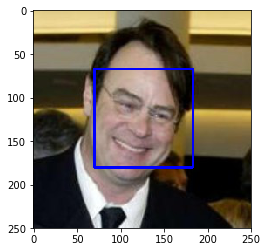

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_in_human = sum([(face_detector(x)) for x in human_files_short])
print('Percentage of human images detected as human faces: {:.2f}%'.format(human_in_human))
human_in_dog = sum([(face_detector(x)) for x in dog_files_short])
print('Percentage of dog images detected as human faces: {:.2f}%'.format(human_in_dog))


Percentage of human images detected as human faces: 98.00%
Percentage of dog images detected as human faces: 17.00%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
vgg16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    vgg16 = vgg16.cuda()
    
for param in vgg16.parameters():
    param.requires_grad = False
    

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 101600382.82it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
import torchvision.transforms as transforms
# define the transform for pre-processing images for pytorch models
transform = transforms.Compose([transforms.Resize(256),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                     std=[0.229, 0.224, 0.225])])




In [7]:
from PIL import Image


def vgg16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path)
    img_processed = torch.unsqueeze(transform(img), 0)
    
#     un_img = (1/(2*2.25)) * img_processed + 0.5
#     plt.imshow(np.transpose(un_img.squeeze(0), (1, 2, 0)))
#     plt.show()

    vgg16.eval()

    if use_cuda:
        img_processed = img_processed.cuda()

    output = vgg16(img_processed)
    _, pred_tensor = torch.max(output, 1)
    pred = np.squeeze(pred_tensor.numpy()) if not use_cuda else np.squeeze(pred_tensor.cpu().numpy())
        
    return pred.item() # predicted class index

In [8]:
# testing the vgg16_predict function 
input_image = dog_files[130]
print(input_image)
print(vgg16_predict(input_image))

input_image = human_files[130]
print(input_image)
print(vgg16_predict(input_image))


/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03877.jpg
206
/data/lfw/Jean_Charest/Jean_Charest_0013.jpg
389


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [9]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    imagenet_class = vgg16_predict(img_path)
    if 151 <= imagenet_class <= 268:
        return True
    return False

print(dog_detector(dog_files[10]))
print(dog_detector(human_files[10]))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [10]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_has_dog = sum([dog_detector(x) for x in human_files_short])
print('Percentage of humans detected as dog: {:.2f}%'.format(human_has_dog))
dog_has_dog = sum([dog_detector(x) for x in dog_files_short])
print('Percentage of dogs detected as dog: {:.2f}%'.format(dog_has_dog))


Percentage of humans detected as dog: 0.00%
Percentage of dogs detected as dog: 100.00%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers = 0
data_dir = '/data/dog_images/'

# check if cuda is available
train_on_gpu = torch.cuda.is_available()

# Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(256),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


test_transforms = transforms.Compose([transforms.Resize(255),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

train_dataset = datasets.ImageFolder(data_dir + 'train', transform=train_transforms)
valid_dataset = datasets.ImageFolder(data_dir + 'valid', transform=test_transforms)
test_dataset = datasets.ImageFolder(data_dir + 'test', transform=test_transforms)

train_sampler = SubsetRandomSampler(list(range(len(train_dataset))))
valid_sampler = SubsetRandomSampler(list(range(len(valid_dataset))))
test_sampler = SubsetRandomSampler(list(range(len(test_dataset))))

loaders = {}
loaders['train'] = torch.utils.data.DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size, num_workers=num_workers)
loaders['valid'] = torch.utils.data.DataLoader(valid_dataset, sampler=valid_sampler, batch_size=batch_size, num_workers=num_workers)
loaders['test'] = torch.utils.data.DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size, num_workers=num_workers)



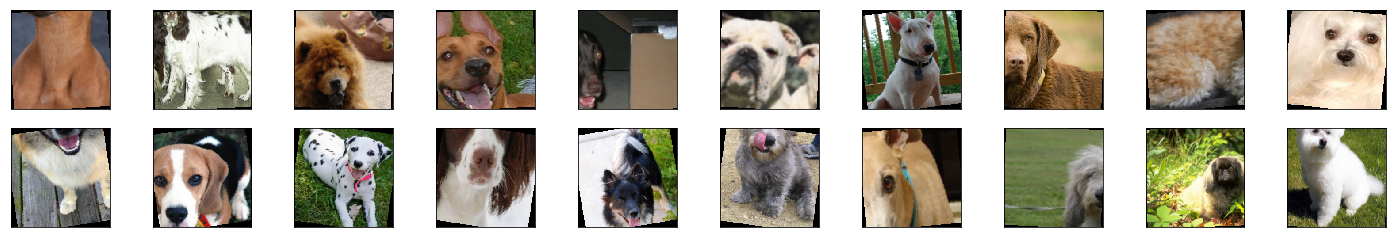

In [11]:
# Display the image
dataiter = iter(loaders['train'])
images, labels = next(dataiter)

# un-normalize
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

# plot the images in the batch along with their labels
fig = plt.figure(figsize=(25, 4))
for idx in range(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    inv_normalize_image = inv_normalize(images[idx])
    plt.imshow(np.transpose(inv_normalize_image.numpy(), (1, 2, 0)))
plt.show()


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
Resized the images to 256 pixels and then a random crop of 224 pixels. The input tensor will be 224 X 224 as the images are re-sized to 224 pixels and 3 color channels ==> 3 X 224 X224.

Data augmentation is used to generalize better on the unseen dataset and also helps avoid overfitting. 

The training images are 
- Resize - resize the image to 256 X 256 pixels
- RandomResizedCrop - random crop the image to 224 X 224 pixels
- RandomRotation - random rotated 10 degrees
- RandomHorizontalFlip - horizontally flip the images on random

The test images are
- Resize - resize the image to 256 X 256 pixels
- CenterCrop - crop the image centrally for 224 X 224 pixels

Both images are normalized for pytorch models --> mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225].

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Convolution layer: Increase the depth from 3 ==> 16
        self.conv_1 = nn.Conv2d(3, 16, 3, padding=1)
        # Convolution layer 2: Increase the depth from 16 ==> 32
        self.conv_2 = nn.Conv2d(16, 32, 3, padding=1)
        # Convolution layer 3: Increase the depth from 32 ==> 64
        self.conv_3 = nn.Conv2d(32, 64, 3, padding=1)
#         # Convolution layer 4: Increase the depth from 64 ==> 128
#         self.conv_4 = nn.Conv2d(64, 128, 3, padding=1)
#         # Convolution layer 5: Increase the depth from 128 ==> 256
#         self.conv_5 = nn.Conv2d(128, 256, 3, padding=1)
        
        # Max pooling layer: Downsize the image by half
        self.pool = nn.MaxPool2d(2, 2)

        # Linear layer 1: 256 X 7 X 7 ==> 500
        self.fc_1 = nn.Linear(64 * 28 * 28, 500)
        # Linear layer 2: 500 ==> 133
        self.fc_2 = nn.Linear(500, 133)

        # Dropout
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv_1(x)))   # 3 X 224 X 224  ==> 16 X 224 X 224 ==> 16 X 112 X 112
        x = self.pool(F.relu(self.conv_2(x)))   # 16 X 112 X 112 ==> 32 X 112 X 112 ==> 32 X 56 X 56
        x = self.pool(F.relu(self.conv_3(x)))   # 32 X 56 X 56   ==> 64 X 56 X 56   ==> 64 X 28 X 28
#         x = self.pool(F.relu(self.conv_4(x)))   # 64 X 28 X 28   ==> 128 X 28 X 28  ==> 128 X 14 X 14
#         x = self.pool(F.relu(self.conv_5(x)))   # 128 X 14 X 14  ==> 256 X 14 X 14  ==> 256 X 7 X 7
        x = self.dropout(x)                     # Dropout of 25%
        x = x.view(-1, 64 * 28 * 28)             # Flatten the image to 64 X 28 X 28              
        x = self.dropout(F.relu(self.fc_1(x)))   # 64 X 28 X 28 ==> 500
        x = self.fc_2(x)                         # 500 ==> 133
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    
print(model_scratch)    

Net(
  (conv_1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_1): Linear(in_features=50176, out_features=500, bias=True)
  (fc_2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The model contains a series of convolutional layers and maxpooling layers followed by fully connected linear layers to produce the output of 133 classes. There are 5 convolutional layers with filters 16, 32, 64, 128 and 256 respectively. 

Maxpooling is applied after each convolutional layer to reduce the x-y size of the input and only keeping the most active pixels from the previous layer. The ReLU activation function is applied to each convolutional layer. 

So, after the convolutional layers and maxpooling layers the input image is greatly reduced in x-y size and only the relevent features are extracted in the depth. 

After which there are 2 fully connected layers. The output from the convolutional layers is first flattened to feed into the linear layers along with a dropout of 25% to avoid overfitting. The output of the 2 fully connected layers produce the 133 dim output for 133 class labels. ReLU activation is applied to the first fully connected layer along with a dropout of 25% to avoid overfitting. 

Model:

- Conv 1 + Maxpooling: 3 X 224 X 224  ==> 16 X 224 X 224 ==> 16 X 112 X 112
- Conv 2 + Maxpooling: 16 X 112 X 112 ==> 32 X 112 X 112 ==> 32 X 56 X 56 
- Conv 3 + Maxpooling: 32 X 56 X 56   ==> 64 X 56 X 56   ==> 64 X 28 X 28 
- Conv 4 + Maxpooling: 64 X 28 X 28   ==> 128 X 28 X 28  ==> 128 X 14 X 14
- Conv 5 + Maxpooling: 128 X 14 X 14  ==> 256 X 14 X 14  ==> 256 X 7 X 7 
- Linear 1 : 256 X 7 X 7 ==> 500 
- Linear 2 : 500 ==> 133

Note: I have removed the Conv 4 and 5 layers to speed up the training. With the first 3 conv layers we can achive more than 10%. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [15]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass
            loss.backward()
            # optimizer step
            optimizer.step()
            # update the training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # print the batch loss
            if batch_idx % 100 == 0:
                print('Epoch {}, Batch {}, Loss: {:.6f}'.format(epoch, batch_idx+1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update the validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
                
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min,
                valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss 
            
    # return trained model
    return model





In [34]:
# train the model
model_scratch = train(30, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch 1, Batch 1, Loss: 3.542204
Epoch 1, Batch 101, Loss: 3.632097
Epoch 1, Batch 201, Loss: 3.593550
Epoch 1, Batch 301, Loss: 3.600812
Epoch: 1 	Training Loss: 3.609727 	Validation Loss: 3.652053
Validation loss decreased (inf --> 3.652053).  Saving model ...
Epoch 2, Batch 1, Loss: 3.544524
Epoch 2, Batch 101, Loss: 3.519224
Epoch 2, Batch 201, Loss: 3.536942
Epoch 2, Batch 301, Loss: 3.559055
Epoch: 2 	Training Loss: 3.567576 	Validation Loss: 3.756922
Epoch 3, Batch 1, Loss: 3.502731
Epoch 3, Batch 101, Loss: 3.552799
Epoch 3, Batch 201, Loss: 3.578695
Epoch 3, Batch 301, Loss: 3.584276
Epoch: 3 	Training Loss: 3.585981 	Validation Loss: 3.694345
Epoch 4, Batch 1, Loss: 3.656881
Epoch 4, Batch 101, Loss: 3.478350
Epoch 4, Batch 201, Loss: 3.488461
Epoch 4, Batch 301, Loss: 3.512168
Epoch: 4 	Training Loss: 3.523743 	Validation Loss: 3.721059
Epoch 5, Batch 1, Loss: 3.129371
Epoch 5, Batch 101, Loss: 3.525875
Epoch 5, Batch 201, Loss: 3.556813
Epoch 5, Batch 301, Loss: 3.539353
Ep

In [16]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [17]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.676376


Test Accuracy: 15% (127/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [18]:
import numpy as np
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt                        
%matplotlib inline                               
import torch.optim as optim

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

n_classes = 133
# We can load in a model such as DenseNet.
model_transfer = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad=False

# Create a classifier that satisfies our purpose and replace the classifier in the model (pretrained densenet model)
# Classifier layer of densenet has 1024 input, that is got as input for our classifier and get 133 output classes
model_transfer.classifier = nn.Linear(model_transfer.classifier.in_features, n_classes)

for param in model_transfer.classifier.parameters():
    param.requires_grad=True
    
if use_cuda:
    model_transfer = model_transfer.cuda()

print(model_transfer)    

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 84438072.85it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I have selected DenseNet pre-trained on ImageNet data set for this image classification task. I did review DenseNet with ResNet50 architecture. In DenseNet, each layer obtains additional inputs from all preceding layers and passes on its own feature-maps to all subsequent layers. Concatenation is used. Each layer is receiving a “collective knowledge” from all preceding layers. Since each layer receives feature maps from all preceding layers, network can be thinner and compact, i.e. number of channels can be fewer. The advantages of DenseNet over Resnet can be studied in this article - https://towardsdatascience.com/review-densenet-image-classification-b6631a8ef803. 
So, I have taken the DenseNet architecture and replaced the "classifier" layer with a custom classfier layer. The original densenet classifier layer is a single fully connected layer with 1024 inputs and 1000 outputs. The new classifier has 1024 inputs (same as densenet) and 133 output classes (for dog breeds). 


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [28]:
# train the model
model_transfer = train(30, loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')



Epoch 1, Batch 1, Loss: 3.052329
Epoch 1, Batch 101, Loss: 3.442759
Epoch 1, Batch 201, Loss: 3.408830
Epoch 1, Batch 301, Loss: 3.393531
Epoch: 1 	Training Loss: 3.387749 	Validation Loss: 2.895708
Validation loss decreased (inf --> 2.895708).  Saving model ...
Epoch 2, Batch 1, Loss: 3.056894
Epoch 2, Batch 101, Loss: 3.304331
Epoch 2, Batch 201, Loss: 3.285641
Epoch 2, Batch 301, Loss: 3.280096
Epoch: 2 	Training Loss: 3.275614 	Validation Loss: 2.766230
Validation loss decreased (2.895708 --> 2.766230).  Saving model ...
Epoch 3, Batch 1, Loss: 3.323762
Epoch 3, Batch 101, Loss: 3.220849
Epoch 3, Batch 201, Loss: 3.205763
Epoch 3, Batch 301, Loss: 3.193567
Epoch: 3 	Training Loss: 3.191186 	Validation Loss: 2.670672
Validation loss decreased (2.766230 --> 2.670672).  Saving model ...
Epoch 4, Batch 1, Loss: 3.019839
Epoch 4, Batch 101, Loss: 3.129592
Epoch 4, Batch 201, Loss: 3.096992
Epoch 4, Batch 301, Loss: 3.097250
Epoch: 4 	Training Loss: 3.097163 	Validation Loss: 2.514153
Va

In [21]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [22]:
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.201221


Test Accuracy: 77% (650/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [23]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders['train'].dataset.classes]
# print(class_names)

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    transformations = transforms.Compose([transforms.Resize(size=224),
                                          transforms.CenterCrop((224,224)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = transformations(img)[:3,:,:].unsqueeze(0)
    if use_cuda:
        image = image.cuda()
        
    output = model_transfer(image)    
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    return class_names[pred]
    

In [24]:
def display_image(img_path): 
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()              

/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04189.jpg


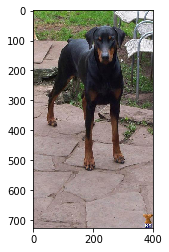

Doberman pinscher
/data/dog_images/train/103.Mastiff/Mastiff_06831.jpg


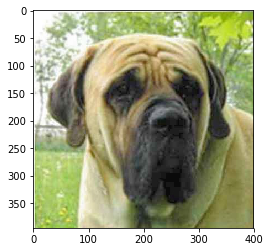

Bullmastiff
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04171.jpg


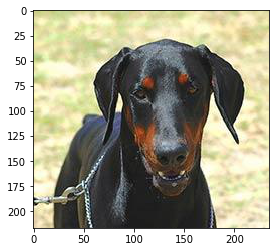

Doberman pinscher
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04214.jpg


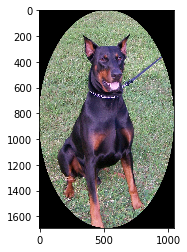

Doberman pinscher
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04188.jpg


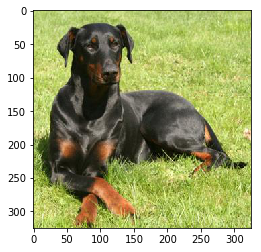

Doberman pinscher
/data/dog_images/train/103.Mastiff/Mastiff_06860.jpg


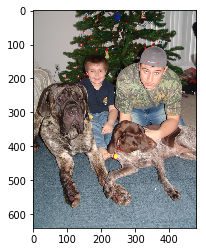

German shorthaired pointer
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04193.jpg


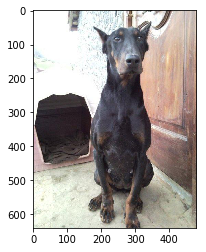

Doberman pinscher
/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04180.jpg


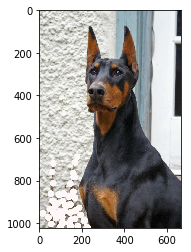

Doberman pinscher
/data/dog_images/train/103.Mastiff/Mastiff_06863.jpg


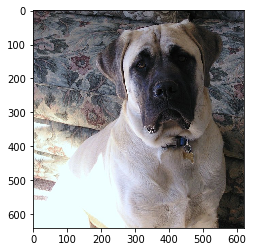

Mastiff
/data/dog_images/train/103.Mastiff/Mastiff_06818.jpg


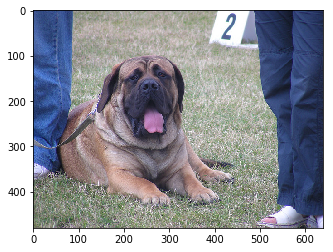

Bullmastiff


In [25]:
import random
for image in random.sample(list(dog_files_short), 10):
    predicted_breed = predict_breed_transfer(image)
    print(image)
    display_image(image)
    print(predicted_breed)

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [44]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if face_detector(img_path):
        predicted_breed = predict_breed_transfer(img_path)
        print('hello, human')
        display_image(img_path)
        print('You look like a...\n'+ predicted_breed)
        
    elif dog_detector(img_path):
        predicted_breed = predict_breed_transfer(img_path)
        print('hello, dog')
        display_image(img_path)
        print('You look like a...\n'+ predicted_breed)
        
    else:
        display_image(img_path)
        print('Error: It\'s neither a dog nor a human!')
    print("-------------------------------------------")    
       
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The algorithm does better as it is using a pre-trained DenseNet model.

Improvement points:
- Train the model for more epochs
- Compare different pre-trained models and try out variation of hyperparameters, loss function, optimizers 
- Detect multiple human and dog in the same image or more than one human or dog in the same image
- Train the model with more augmented images 

In [41]:
import glob


Input image: images/American_water_spaniel_00648.jpg
hello, dog


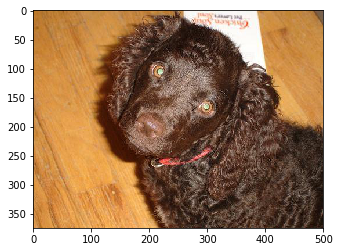

You look like a...
Curly-coated retriever
-------------------------------------------
Input image: images/Welsh_springer_spaniel_08203.jpg
hello, dog


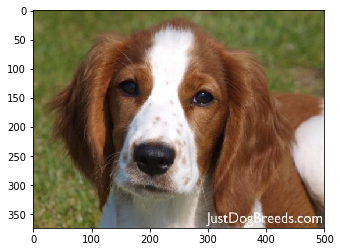

You look like a...
Welsh springer spaniel
-------------------------------------------
Input image: images/Gina_Torres_0001.jpg
hello, human


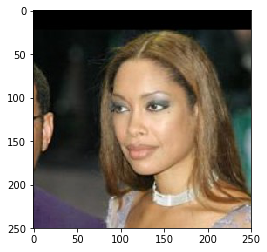

You look like a...
Dogue de bordeaux
-------------------------------------------
Input image: images/Brittany_02625.jpg
hello, dog


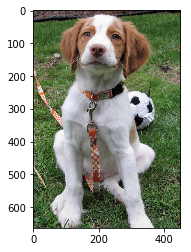

You look like a...
Brittany
-------------------------------------------
Input image: images/Labrador_retriever_06455.jpg
hello, dog


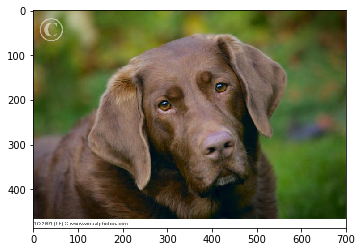

You look like a...
German shorthaired pointer
-------------------------------------------
Input image: images/Curly-coated_retriever_03896.jpg
hello, dog


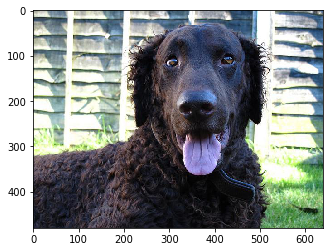

You look like a...
Curly-coated retriever
-------------------------------------------
Input image: images/Miguel_Aldana_Ibarra_0001.jpg
hello, human


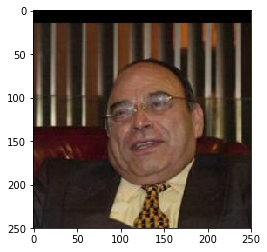

You look like a...
German shorthaired pointer
-------------------------------------------
Input image: images/Labrador_retriever_06457.jpg
hello, dog


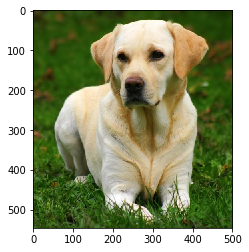

You look like a...
Labrador retriever
-------------------------------------------
Input image: images/Labrador_retriever_06449.jpg
hello, dog


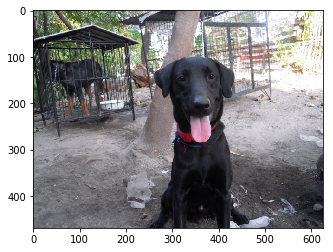

You look like a...
Labrador retriever
-------------------------------------------
Input image: images/Zumrati_Juma_0001.jpg
hello, human


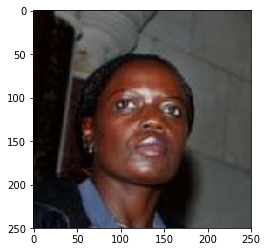

You look like a...
Chinese crested
-------------------------------------------


In [46]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below

for file in glob.glob('images/*.jpg'):
    print('Input image:', file)
    run_app(file)